In [1]:
asdf=1

1

In [2]:
using PyPlot, Images, ImageView
using FixedPointNumbers

INFO: Loading help data...


In [3]:
using Modulador

In [5]:
methods(blazeMat)

# 1 method for generic function "blazeMat":
blazeMat(nVer::Integer,nHor::Integer,dosPi::Integer,periodo::Integer) at /home/santiago/Documentos/Escuela-maestría/1er-semestre/Física-computacional/Clase/MisModulos/Modulador/src/Modulador.jl:20

In [6]:

blaze10=blazeMat(600,800,256,10)
img1=grayImage(blaze10)
rampa=blazeMat(600,800,256,800)
img2=grayImage(rampa)
img3=grayImage(blaze10+rampa);

In [7]:
# Con esto debo ver distintas blaze en 2nd monitor
monitor2(img1)
sleep(4)
monitor2(img2)
sleep(4)
monitor2(img3);

In [9]:
destroy(toplevel(canvas2ndScreen[1])); #Con esto cierro la ventana emergente

""

## Lo siguiente fue escrito para la construcción de las funciones listadas arriba

Gray{Ufixed8}(1.0)
Gray{Ufixed8}(0.0)


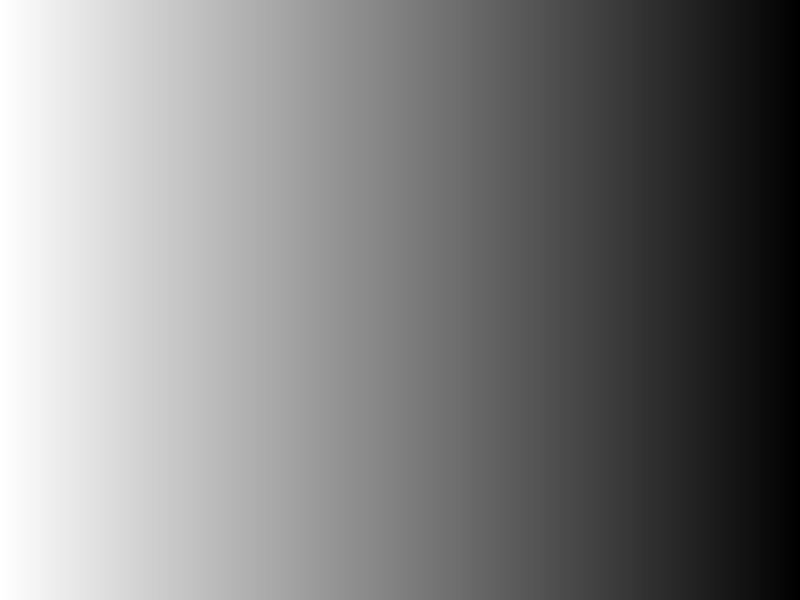

In [6]:
nHor=800
nVer=600
dosPi=256
periodo=nHor

blaze=zeros(Gray{Ufixed8},nVer,nHor)

for i=1:nVer
    for j=1:nHor
        blaze[i,j]=Gray{Ufixed8}(uint8(int64(   mod1(  (mod1(j,periodo) -periodo) *(dosPi-1)/(periodo-1)  , dosPi  )  )))
    end
end

println(blaze[1,1])
println(blaze[1,periodo])
Image(blaze)

Gray{Ufixed8}(1.0)
Gray{Ufixed8}(0.0)
Gray{Ufixed8}(1.0)
Gray{Ufixed8}(0.0)
Gray{Ufixed8}(1.0)
Gray{Ufixed8}(0.0)


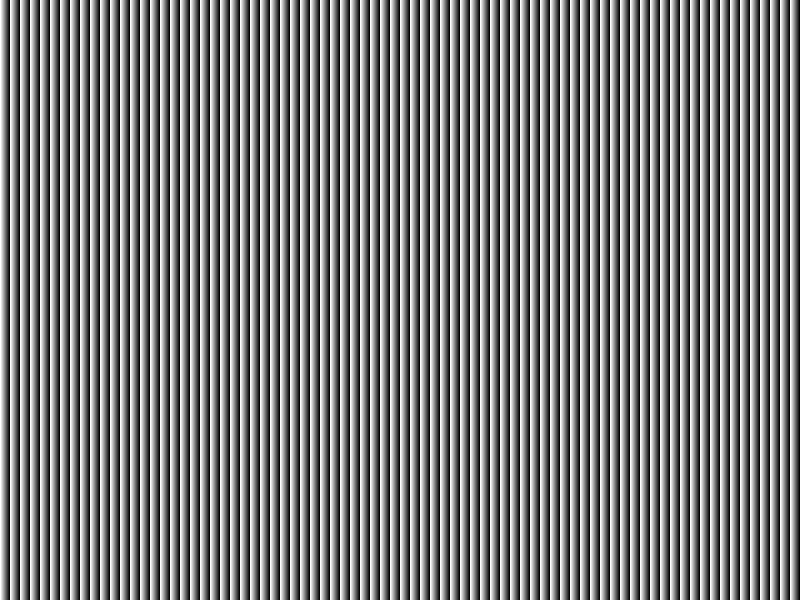

In [7]:
nHor=800
nVer=600
dosPi=256
periodo=10

blaze=zeros(Gray{Ufixed8},nVer,nHor)

for i=1:nVer
    for j=1:nHor
        blaze[i,j]=Gray{Ufixed8}(uint8(int64(   mod1(  (mod1(j,periodo) -periodo) *(dosPi-1)/(periodo-1)  , dosPi    )  )))
    end
end

println(blaze[1,1])
println(blaze[1,periodo])
println(blaze[1,periodo+1])
println(blaze[1,2*periodo])
println(blaze[1,nVer-periodo+1])
println(blaze[1,nVer])
Image(blaze)

#### Ahora hago las funciones

La función blazeMat da un arreglo de `nVer` $\times$ `nHor` enteros que representa una rejilla blaze. El tercer argumento que toma la función es el entero que representa la fase $2\pi$ y el cuarto argumento es el periodo (en pixeles).

La función grayImage toma como argumento una matriz de enteros de `nVer` $\times$ `nHor`(como la que genera blazeMat) y la convierte en una imagen.

In [2]:
function blazeMat(nVer::Integer, nHor::Integer, dosPi::Integer, periodo::Integer)
    matInt=zeros(Int64,nVer,nHor)
    for i=1:nVer
        for j=1:nHor
            matInt[i,j]=int64(   mod1(  (mod1(j,periodo) -periodo) *(dosPi-1)/(periodo-1)  , dosPi    )  )
        end
    end
    matInt
end

function grayImage(matInt::Array{Int64,2})
    nVer=size(matInt)[1]
    nHor=size(matInt)[2]
    matGray=zeros(Gray{Ufixed8},nVer,nHor)
    for i=1:nVer
        for j=1:nHor
            matGray[i,j]=Gray{Ufixed8}(matInt[i,j])
        end
    end
    Image(matGray)
end

grayImage (generic function with 1 method)

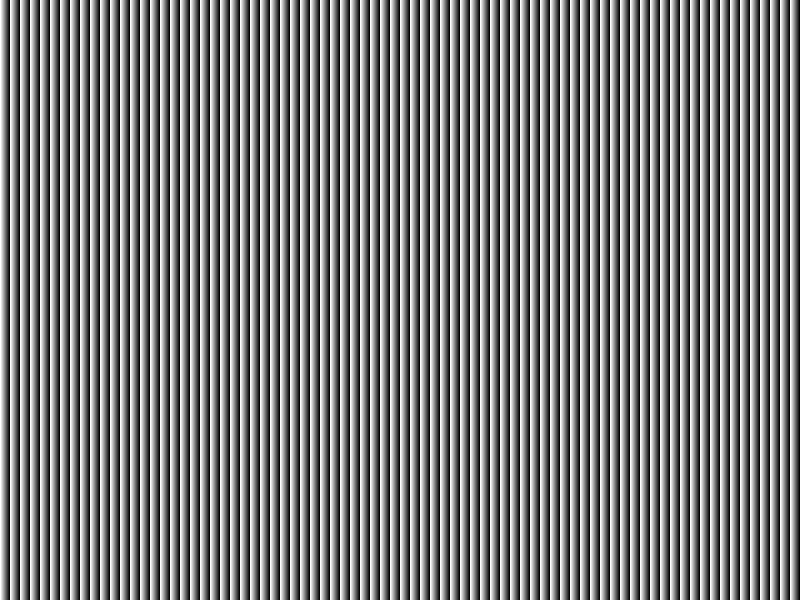

In [3]:
blaze10=blazeMat(600,800,256,10)
grayImage(blaze10)

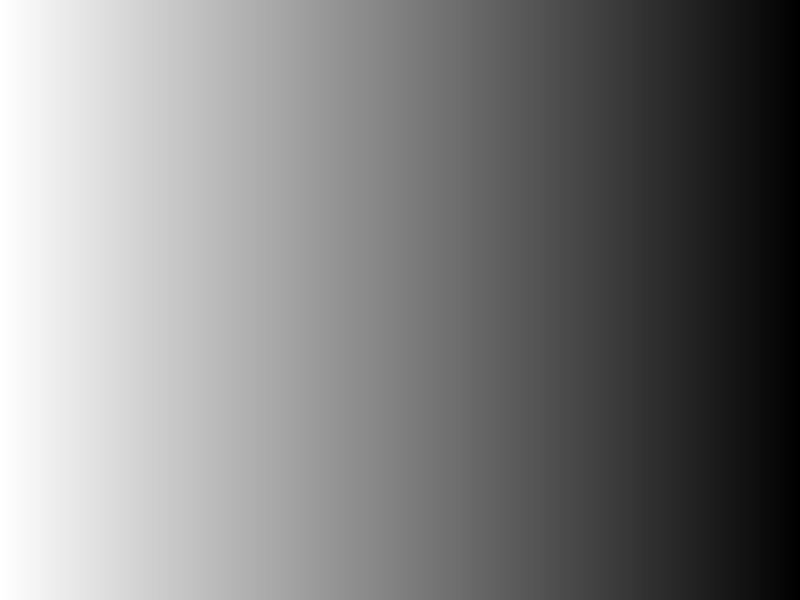

In [4]:
rampa=blazeMat(600,800,256,800)
grayImage(rampa)

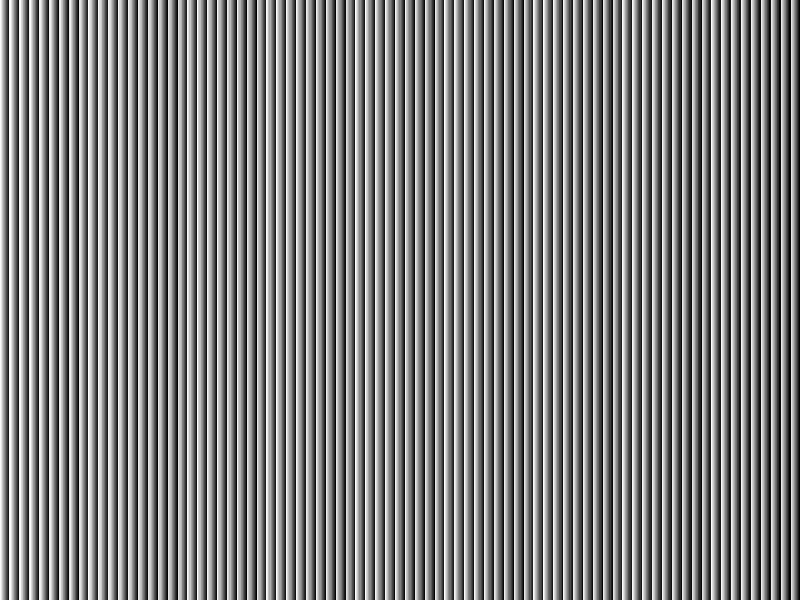

In [5]:
sumados=grayImage(blaze10+rampa) #no se que signifiqué, pero se pueden sumar :D
# ya se que significa, es la suma hecha correctamente, el Gray{Ufixed8} 
# ya saca el modulo a la suma. Mira los siguientes In's

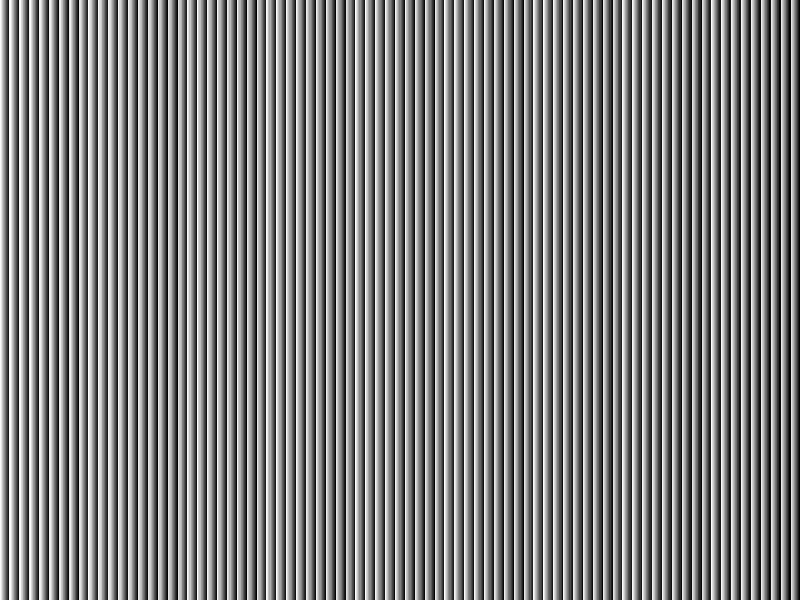

In [9]:
blaze10rampa=similar(rampa)
for i=1:nVer
    for j=1:nHor
        blaze10rampa[i,j]=mod1(rampa[i,j] + blaze10[i,j] ,dosPi)
    end
end

grayImage(blaze10rampa)

In [10]:
grayImage(blaze10+rampa)==grayImage(blaze10rampa) # son lo mismo!!! :D

true

## Comandos para guardar imagenes y abrirlas en 'Visor de imágenes' (Eye of Gnome)

Esta opción funciona pero no me gusta mucho, parece que tarda en guardar imagen en memoria, si estoy trabajando en alguna otra ventana la barra de estado sí aparece en 2do monitor y por último al quitar la configuración `dconforg-2ndscreen-EyeG.dat` y regresar a la normal, parece no eliminarse inmediatamente el hecho de abrir imágenes en `Fullscreen`. Optaré por la opción de girar la pantalla y usar la ventana de ImageView.view

In [6]:
img1=grayImage(blaze10)
img2=grayImage(rampa)
img3=sumados;

In [21]:
img1View=ImageView.view(img1);
destroy(toplevel(img1View[1])); #Con esto cierro la ventana emergente
img2View=ImageView.view(img2);
destroy(toplevel(img2View[1])); #Con esto cierro la ventana emergente
img3View=ImageView.view(img3);
destroy(toplevel(img3View[1])); #Con esto cierro la ventana emergente
write_to_png(img1View[1],"pruebbas")

In [ ]:
#Debo estar en configuración dconforg-2ndscreen-EyeG.dat para esto:
;eog pruebbas &

In [23]:
write_to_png(img1View[1],"pruebbas")
sleep(5)
write_to_png(img2View[1],"pruebbas")
sleep(5)
write_to_png(img3View[1],"pruebbas")

Se ve muy bien, excepto porque tengo que seleccionar el ícono de visor de imagenes para que no se vea la barra de estado en 2da pantalla

## Ahora pruebo con ImageView.view

Primero cargo la configuración dconforg-2ndscreen-ImageView.dat para abrir la imagen en monitor 2

`dconf load /org/ < ~/dconforg-2ndscreen-ImageView.dat` $\hspace{1cm}$ este comando está en el archivo PrepMonit2

Ahora abro la imagen

`img1View=ImageView.view(img1)`

Y regreso a configuración original dconforg.dat

`dconf load /org/ < ~/dconforg.dat` $\hspace{1cm}$ este comando está en el archivo PrepMonit2

In [7]:
run(`bash /home/santiago/Documentos/Escuela-maestría/1er-semestre/Física-computacional/Clase/MisModulos/Modulador/src/PrepMonit2`)
sleep(1)
img1View=ImageView.view(grayImage(ones(Int64,800,600))) #(img1)

run(`bash /home/santiago/Documentos/Escuela-maestría/1er-semestre/Física-computacional/Clase/MisModulos/Modulador/src/PrepMonit3`)

In [8]:
ImageView.view(img1View[1],img1)
sleep(5)
ImageView.view(img1View[1],img2)
sleep(5)
ImageView.view(img1View[1],img3)
sleep(5)

In [9]:
destroy(toplevel(img1View[1])); #Con esto cierro la ventana emergente

""

In [22]:
asdf=ImageView.view(img1)

(ImageCanvas,ImageSlice2d: zoom = BoundingBox(0.0,800.0,0.0,600.0))

In [23]:
destroy(toplevel(asdf[1])); #Con esto cierro la ventana emergente

""

Este proceso se ve mucho más natural y eficiente, el único problema es la %&$#... barra de estado. Sin embargo en la otra opción tambien está la barra de estado a menos que esté seleccionando el ícono de visor de imágenes.

## Voy a modificar las funciones para que generen imagenes volteadas

In [19]:
function blazeMat(nVer::Integer, nHor::Integer, dosPi::Integer, periodo::Integer)
    matInt=zeros(Int64,nHor,nVer)
    for i=1:nVer
        for j=1:nHor
            matInt[j,i]=int64(   mod1(  (mod1(j,periodo) -periodo) *(dosPi-1)/(periodo-1)  , dosPi    )  )
        end
    end
    matInt
end

function grayImage(matInt::Array{Int64,2})
    nVer=size(matInt)[1]
    nHor=size(matInt)[2]
    matGray=zeros(Gray{Ufixed8},nVer,nHor)
    for i=1:nVer
        for j=1:nHor
            matGray[i,j]=Gray{Ufixed8}(matInt[i,j])
        end
    end
    Image(matGray)
end

grayImage (generic function with 1 method)

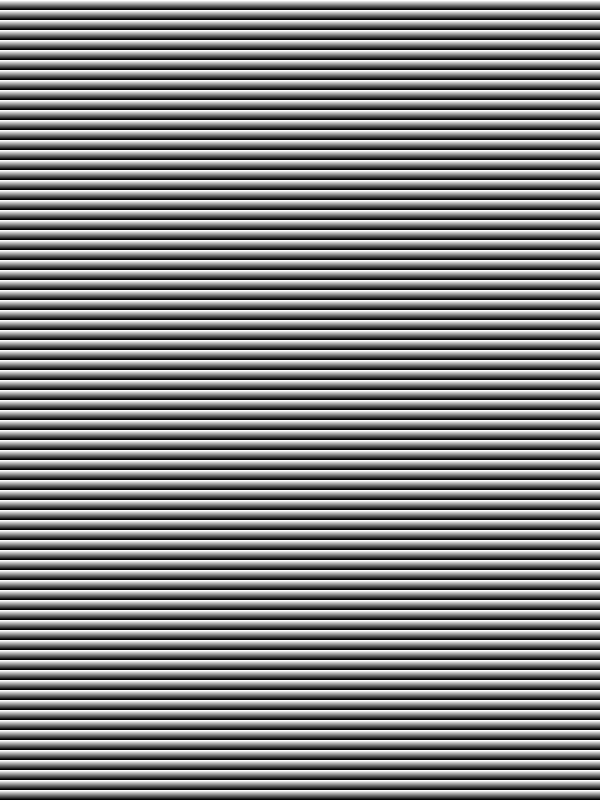

In [20]:
blaze10=blazeMat(600,800,256,10)
grayImage(blaze10)